# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    #city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | arkadak
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | ixtapa
Processing Record 6 of Set 1 | pilar
Processing Record 7 of Set 1 | neuquen
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | najran
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | tiznit
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | comodoro rivadavia
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | mataura


Processing Record 37 of Set 4 | natal
Processing Record 38 of Set 4 | saint-francois
Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | shizunai
Processing Record 41 of Set 4 | tayga
Processing Record 42 of Set 4 | necochea
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | bouafle
Processing Record 45 of Set 4 | lima
Processing Record 46 of Set 4 | barrow
Processing Record 47 of Set 4 | khasan
Processing Record 48 of Set 4 | mandalay
Processing Record 49 of Set 4 | dongsheng
Processing Record 0 of Set 5 | komsomolskiy
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | abalak
Processing Record 3 of Set 5 | sao filipe
Processing Record 4 of Set 5 | ambilobe
Processing Record 5 of Set 5 | san jose de rio tinto
Processing Record 6 of Set 5 | jumla
Processing Record 7 of Set 5 | nizhniy kuranakh
Processing Record 8 of Set 5 | saskylakh
Processing Record 9 of Set 5 | bubaque
Processing Record 10 of Set 5 | cheyenne
Processing

Processing Record 28 of Set 8 | port hardy
Processing Record 29 of Set 8 | hami
Processing Record 30 of Set 8 | achisay
City not found. Skipping...
Processing Record 31 of Set 8 | johnstown
Processing Record 32 of Set 8 | simao
Processing Record 33 of Set 8 | krasnoselkup
Processing Record 34 of Set 8 | oksfjord
Processing Record 35 of Set 8 | manaure
Processing Record 36 of Set 8 | karasjok
Processing Record 37 of Set 8 | mildura
Processing Record 38 of Set 8 | saint joseph
Processing Record 39 of Set 8 | wylie
Processing Record 40 of Set 8 | custodia
Processing Record 41 of Set 8 | kiunga
Processing Record 42 of Set 8 | taltal
Processing Record 43 of Set 8 | kang
Processing Record 44 of Set 8 | nenjiang
Processing Record 45 of Set 8 | favara
Processing Record 46 of Set 8 | ca mau
Processing Record 47 of Set 8 | esmeralda
Processing Record 48 of Set 8 | aguimes
Processing Record 49 of Set 8 | seoul
Processing Record 0 of Set 9 | villa carlos paz
Processing Record 1 of Set 9 | svetlaya

Processing Record 15 of Set 12 | bafoulabe
Processing Record 16 of Set 12 | rocha
Processing Record 17 of Set 12 | mouzakion
City not found. Skipping...
Processing Record 18 of Set 12 | kardailovo
Processing Record 19 of Set 12 | coihaique
Processing Record 20 of Set 12 | helong
Processing Record 21 of Set 12 | grand-santi
Processing Record 22 of Set 12 | voh
Processing Record 23 of Set 12 | mae sai
Processing Record 24 of Set 12 | narsaq
Processing Record 25 of Set 12 | sabang
Processing Record 26 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 27 of Set 12 | ngunguru
Processing Record 28 of Set 12 | mirandopolis
Processing Record 29 of Set 12 | ossora
Processing Record 30 of Set 12 | esso
Processing Record 31 of Set 12 | toliary
City not found. Skipping...
Processing Record 32 of Set 12 | ville-marie
Processing Record 33 of Set 12 | lund
Processing Record 34 of Set 12 | kawalu
Processing Record 35 of Set 12 | merauke
Processing Record 36 of Set 12 | nome
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,-17.82,71,75,4.12,US,1674364933
1,portland,45.5234,-122.6762,7.07,84,100,7.20,US,1674364823
2,arkadak,51.9326,43.4978,-6.63,84,100,4.36,RU,1674365321
3,puerto ayora,-0.7393,-90.3518,23.64,97,41,2.04,EC,1674364806
4,ixtapa,20.7000,-105.2000,21.57,83,40,1.03,MX,1674365321


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-17.82,71,75,4.12,US,1674364933
1,portland,45.5234,-122.6762,7.07,84,100,7.20,US,1674364823
2,arkadak,51.9326,43.4978,-6.63,84,100,4.36,RU,1674365321
3,puerto ayora,-0.7393,-90.3518,23.64,97,41,2.04,EC,1674364806
4,ixtapa,20.7000,-105.2000,21.57,83,40,1.03,MX,1674365321


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

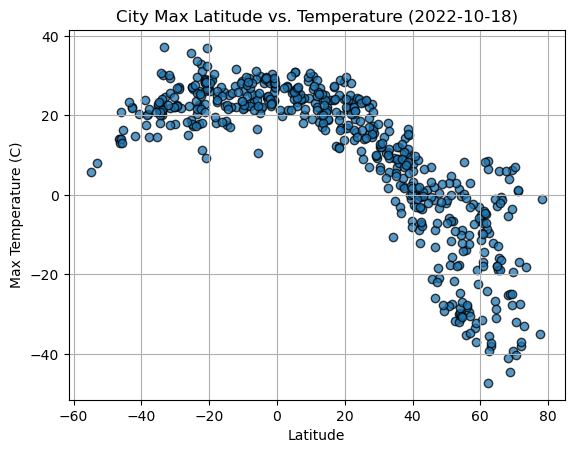

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"] 
temperature = city_data_df["Max Temp"] 
plt.scatter(latitude, temperature, marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

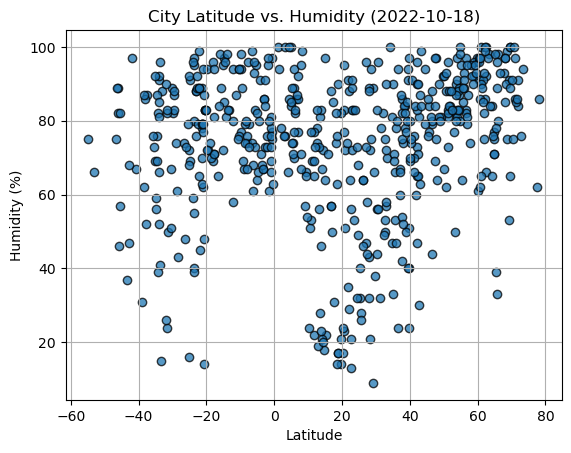

In [9]:
# Build the scatter plots for latitude vs. humidity
#latitude = city_data_df["Lat"] 
humidity = city_data_df["Humidity"] 
plt.scatter(latitude, humidity, marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

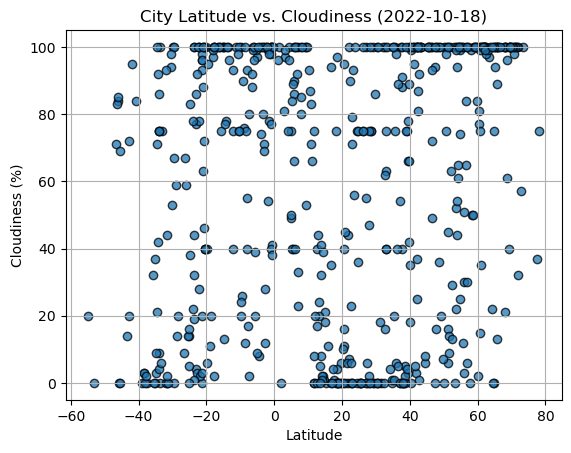

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"] 
plt.scatter(latitude, cloudiness, marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

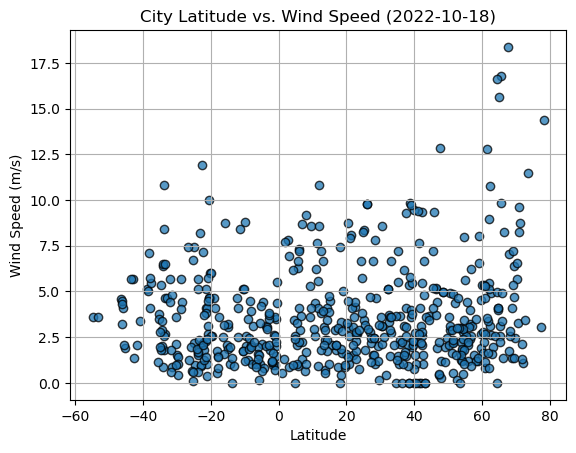

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"] 
plt.scatter(latitude, wind_speed, marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_axis,y_axis,y_label, x, y):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis, alpha = 0.75)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(x,y), fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-17.82,71,75,4.12,US,1674364933
1,portland,45.5234,-122.6762,7.07,84,100,7.20,US,1674364823
2,arkadak,51.9326,43.4978,-6.63,84,100,4.36,RU,1674365321
4,ixtapa,20.7000,-105.2000,21.57,83,40,1.03,MX,1674365321
10,jamestown,42.0970,-79.2353,-0.23,65,100,3.09,US,1674364694


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto ayora,-0.7393,-90.3518,23.64,97,41,2.04,EC,1674364806
5,pilar,-9.5972,-35.9567,21.96,89,26,2.04,BR,1674365132
6,neuquen,-38.9516,-68.0591,23.94,31,0,5.14,AR,1674365197
7,bengkulu,-3.8004,102.2655,28.10,71,74,3.13,ID,1674364817
8,cape town,-33.9258,18.4232,20.06,91,75,1.79,ZA,1674364629


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7131053780503654


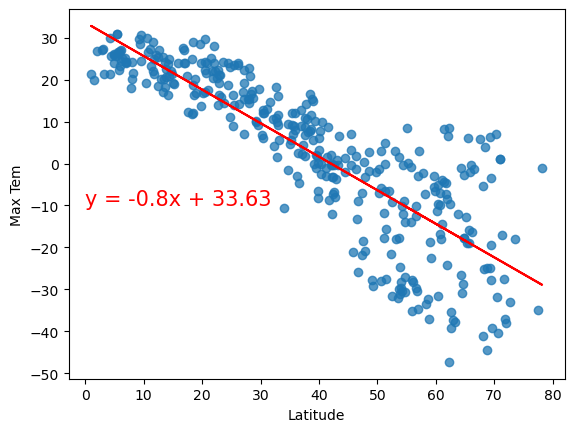

In [15]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Tem",0,-10)

The r-value is: 0.17218764659521443


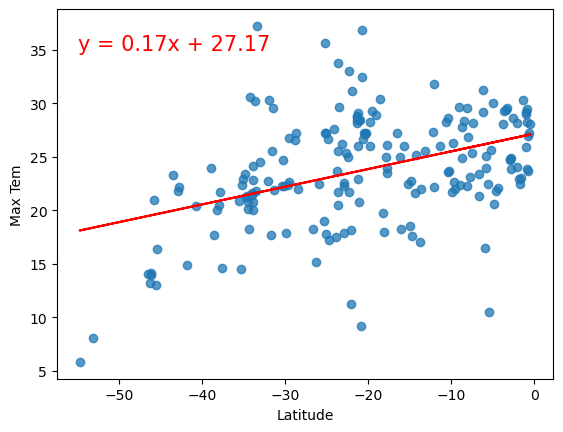

In [16]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Tem",-55,35)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

- From the regression plot, we see a drop in maximum temperature as we go further away from the equator (zero latitudes) on the southern and northern sides.
- When comparing the Northern Hemispheres with the Southern Hemispheres, the drop in maximum temperature is high in the Northern Hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12816455444105895


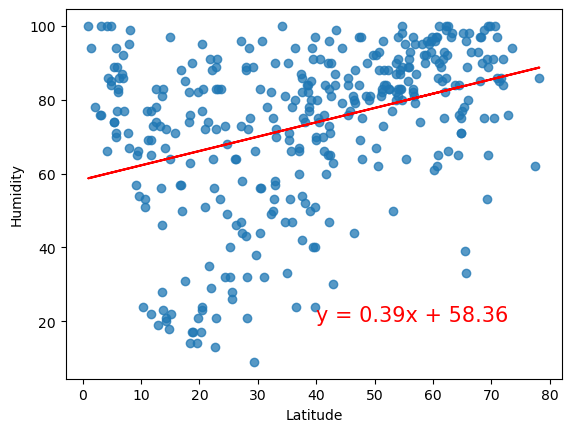

In [17]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity",40,20)


The r-value is: 0.052722638765843016


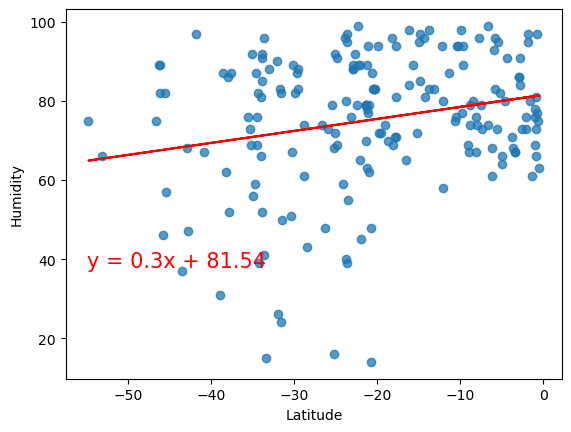

In [18]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity",-55,38)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

- From the regression plot, we see a high increase in Humidity as we go north from the equator (zero latitudes).
- However, Humidity tends to drop in the southern hemisphere as we go south from the equator (zero latitudes).


## Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0885153610357472


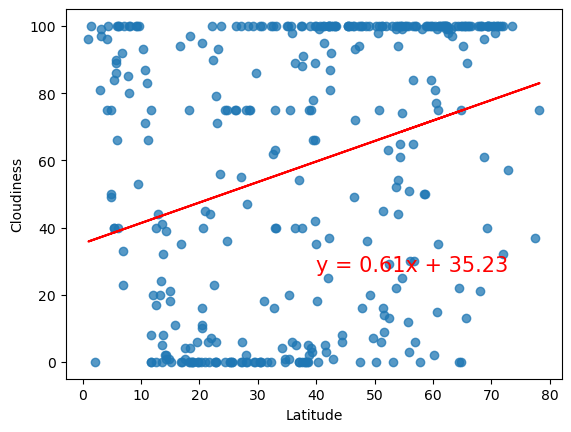

In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness",40,27)


The r-value is: 0.1272801023394482


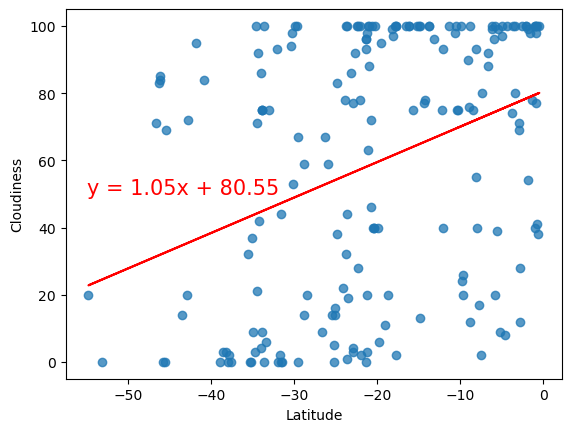

In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness",-55,50)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

- The linear regression plot shows high cloudiness in the northern hemisphere as we go further away from the equator (zero latitudes).
- Conversely, cloudiness decreases as we go south from the equator (zero latitudes).


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01126656213696986


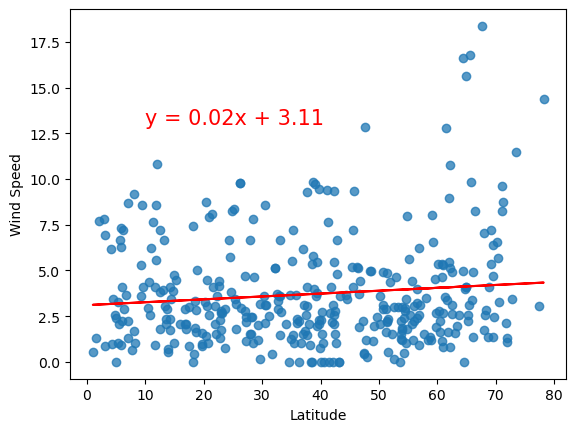

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed",10,13)


The r-value is: 0.05244223564090938


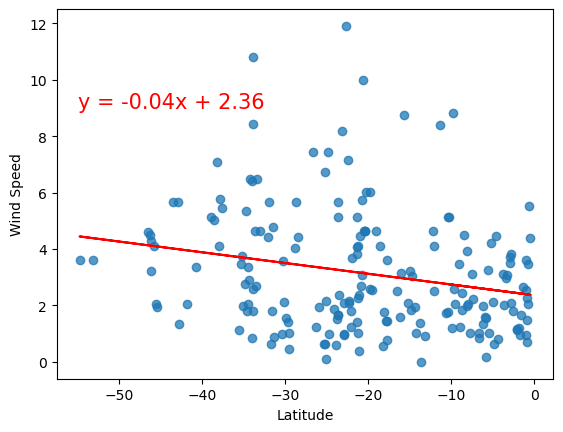

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed",-55,9)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

- In the Northern Hemisphere, there is a slight increase in the wind speed as we go further away from the equator (latitude zero point). Similarly, the wind speed increase as we go further south from the equator (latitude = 0). 
- In other words, the data show less wind speed near the equator.